Task 1:

This assignment is for visualization using matplotlib:
data to use:
url= https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
url= 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
pclass       1309 non-null float64
survived     1309 non-null float64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null float64
parch        1309 non-null float64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


Task 1.1. Create a pie chart presenting the male/female proportion

           ticket
sex              
female  35.572519
male    64.351145


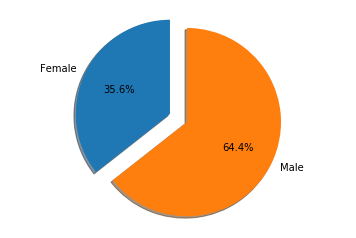

In [2]:
# Pie chart

#Creating a Pivot Table to add into Pie Chart for male/female
func = lambda x: 100*x.count()/titanic.shape[0]   # function to calculate percentage of male/female proportion
table = pd.pivot_table(data=titanic, values='ticket', index='sex', aggfunc=func)
print(table)

#Preparation of figure and axis for Pie Chart
labels = ['Female', 'Male']                       # labels to be given for Pie Chart
explode = (0, 0.2)                                # only "explode" the 2nd slice (i.e. 'Male')

fig1, ax1 = plt.subplots()
ax1.pie(table,  explode=explode , labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Task 1.2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

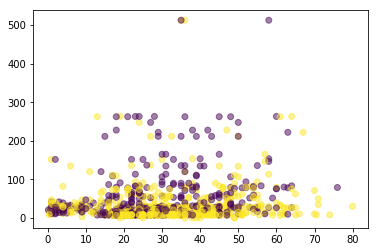

In [3]:
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=pd.factorize(titanic['sex'])[0])
plt.show()

Task 2:

It happens all the time: someone gives you data containing malformed strings, Python, lists and
missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm',
'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


Tas. 2.1. Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [5]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


Task 2.2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [6]:
tDF = pd.DataFrame(df.From_To)
tDF['From'] = tDF.From_To.str.split('_').str.get(0)
tDF['To'] = tDF.From_To.str.split('_').str.get(1)
tDF = tDF.drop('From_To', 1)
tDF

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


Task 2.3. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [7]:
tDF['From'] = tDF.From.str.title()
tDF['To'] = tDF.To.str.title()
tDF

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


Task 2.4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions.

In [8]:
df = df.drop('From_To', 1)
df = pd.concat([tDF,df], axis = 1)
df

,From,To,FlightNumber,RecentDelays,Airline
0,London,Paris,10045,"[23, 47]",KLM(!)
1,Madrid,Milan,10055,[],<Air France> (12)
2,London,Stockholm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest,Paris,10075,[13],12. Air France
4,Brussels,London,10085,"[67, 32]","""Swiss Air"""


Task 2.5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [9]:
tDelay = pd.DataFrame(df.RecentDelays)
tDelay = pd.DataFrame(df['RecentDelays'].values.tolist())
tDelay.columns = ['delay_1', 'delay_2', 'delay_3']
df = df.drop('RecentDelays', 1)
df.insert(3, "delay_1", tDelay['delay_1'])
df.insert(4, "delay_2", tDelay['delay_2'])
df.insert(5, "delay_3", tDelay['delay_3'])
print(df)

       From         To  FlightNumber  delay_1  delay_2  delay_3  \
0    London      Paris         10045     23.0     47.0      NaN   
1    Madrid      Milan         10055      NaN      NaN      NaN   
2    London  Stockholm         10065     24.0     43.0     87.0   
3  Budapest      Paris         10075     13.0      NaN      NaN   
4  Brussels     London         10085     67.0     32.0      NaN   

               Airline  
0               KLM(!)  
1    <Air France> (12)  
2  (British Airways. )  
3       12. Air France  
4          "Swiss Air"  
